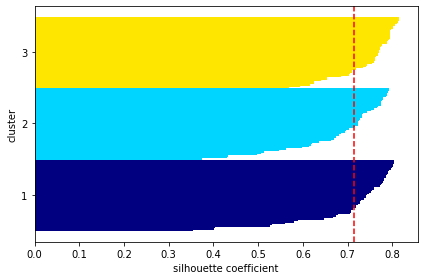

In [ ]:
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#군집이 잘 잡힌경우 실루엣 계수가 1에 가까운 수준이다.
#무작위 데이터 셋을 생성할수가 있음
x,y = make_blobs(n_samples=150,n_features=2,centers = 3,cluster_std=0.5,shuffle=True,random_state=0)
km = KMeans(n_clusters=3,
            init = 'random',
            n_init = 10,
            max_iter= 300,
            tol = 1e-04,
            random_state=0)
y_km = km.fit_predict(x)
#print(y_km) #y_km 은 3개의 클러스터 가 한종류씩 배당 되기 떄문에  0,1,2
cluster_labels = np.unique(y_km) #unquie() : 배열의 중복된 원소를 제거루 유일한 원소를 정렬하여 반환
n_clusters = cluster_labels.shape[0] #shape 값은 3

#print(cluster_labels) #중복을 뺏으니 0,1,2 만 나옴

#x : 임의의 데이터 셋 y_km: 예측 클래스 에 대한 계체 metric : 거리측정방식
silhouette_vals = silhouette_samples(x,y_km,metric='euclidean')

y_ax_lower,y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort() #클러스에 맞는 원소들을 정렬
    #print(i,c_silhouette_vals)

    y_ax_upper += len(c_silhouette_vals)

    color = cm.jet(float(i)/n_clusters) #색깔을 설정할수있는 matplot method
    #jet 의특징은 밝은 하늘색에서 연두색 까지 그 사이값만 표현을 한다.

    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor = 'none',color = color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color = 'red',linestyle = "--") #데이터의 평균 라인을 그리고 싶을떄 쓰는 함수

plt.yticks(yticks,cluster_labels+1)  #눈금 표시하는 함수
plt.ylabel("cluster")
plt.xlabel("silhouette coefficient")

plt.tight_layout()
plt.show()



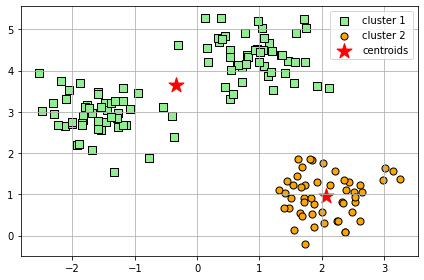

In [ ]:
km = KMeans(n_clusters = 2,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0
            )
y_km = km.fit_predict(x)
plt.scatter(x[y_km == 0,0],
            x[y_km == 0,1],
            s = 50,
            c = 'lightgreen',
            edgecolor = 'black',
            marker = 's',
            label = 'cluster 1')

plt.scatter(x[y_km == 1,0],
            x[y_km == 1,1],
            s = 50,
            c = 'orange',
            edgecolor = 'black',
            marker = 'o',
            label = 'cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s = 250,marker = '*',c = 'red',label = 'centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

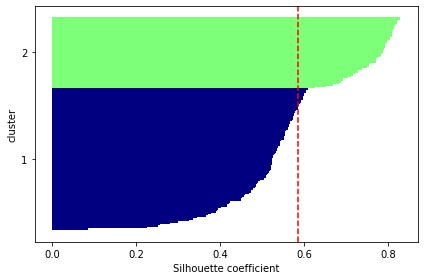

In [ ]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x,y_km,metric = 'euclidean')
y_ax_lower , y_ax_upper = 0,0
yticks = []

for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper+=len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower , y_ax_upper),c_silhouette_vals,height = 1.0,edgecolor = 'none',color = color)
  yticks.append((y_ax_lower+y_ax_upper)/2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color = "red",linestyle = "--")
plt.yticks(yticks,cluster_labels+1)
plt.ylabel('cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()